# ***Online-Retail-Exploratory-Data-Analysis***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from google.colab import files
uploded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df = df.rename(columns={'InvoiceNo':'Invo_no','StockCode':'Sc','Description':'Desc','Quantity':'Qunt','InvoiceDate':'InvoDt','UnitPrice':'Uprice','CustomerID':'CusId'})
df.head()

,Invo_no,Sc,Desc,Qunt,InvoDt,Uprice,CusId,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

In [9]:
# duplicate_rows_df = df[df.duplicated()]
# print("number of duplicate rows: ", duplicate_rows_df.shape)
Duplicate_rows = df[df.duplicated()]
Duplicate_rows.shape

(5268, 8)

In [10]:
df.count()

Invo_no    541909
Sc         541909
Desc       540455
Qunt       541909
InvoDt     541909
Uprice     541909
CusId      406829
Country    541909
dtype: int64

In [11]:
df = df.drop_duplicates()
df.head(5)

,Invo_no,Sc,Desc,Qunt,InvoDt,Uprice,CusId,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df.count()

Invo_no    536641
Sc         536641
Desc       535187
Qunt       536641
InvoDt     536641
Uprice     536641
CusId      401604
Country    536641
dtype: int64

In [14]:
df.isnull().sum()

Invo_no         0
Sc              0
Desc         1454
Qunt            0
InvoDt          0
Uprice          0
CusId      135037
Country         0
dtype: int64

In [18]:
df = df.dropna()
df.count()

Invo_no    401604
Sc         401604
Desc       401604
Qunt       401604
InvoDt     401604
Uprice     401604
CusId      401604
Country    401604
dtype: int64

In [19]:
df.isnull().sum()

Invo_no    0
Sc         0
Desc       0
Qunt       0
InvoDt     0
Uprice     0
CusId      0
Country    0
dtype: int64

# Detecting Outliers

<Axes: xlabel='Uprice'>

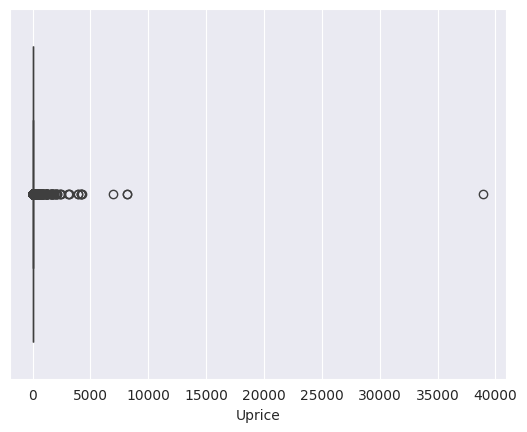

In [20]:
sns.boxplot(x = df['Uprice'])


<Axes: xlabel='Qunt'>

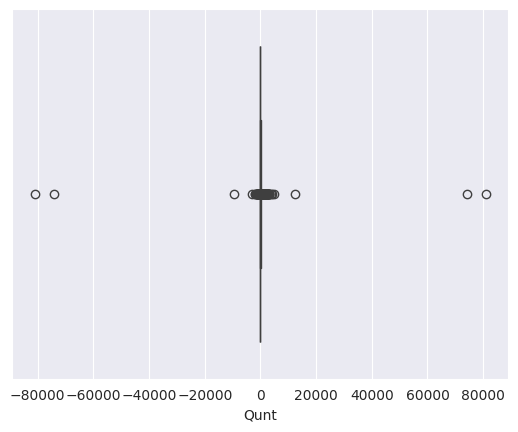

In [21]:
sns.boxplot(x = df['Qunt'])


In [26]:
df['CusId'] = df['CusId'].astype('object')

In [37]:
Q1 = df['Uprice'].quantile(0.25)
Q3 = df['Uprice'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
df = df[(df['Uprice'] >= Q1 - 1.5 * IQR) & (df['Uprice'] <= Q3 + 1.5 * IQR)]
df.shape

(358758, 8)

In [38]:
Q1 = df['Qunt'].quantile(0.25)
Q3 = df['Qunt'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Qunt'] >= Q1 - 1.5 * IQR) & (df['Qunt'] <= Q3 + 1.5 * IQR)]
df.shape

(332571, 8)

In [39]:
df.head()

,Invo_no,Sc,Desc,Qunt,InvoDt,Uprice,CusId,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [49]:
# data_series = pd.Series(df['Desc'])
# unique_values_count = data_series.value_counts()
# unique_values_count

WHITE HANGING HEART T-LIGHT HOLDER    1706
JUMBO BAG RED RETROSPOT               1363
PARTY BUNTING                         1283
LUNCH BAG RED RETROSPOT               1232
SET OF 3 CAKE TINS PANTRY DESIGN      1183
                                      ... 
BLACK CHRISTMAS FLOCK DROPLET            1
BLACK DROP EARRINGS W LONG BEADS         1
Bank Charges                             1
PINK CRYSTAL GUITAR PHONE CHARM          1
FLAMINGO LIGHTS                          1
Name: Desc, Length: 3484, dtype: int64

*Provide top 10 country data by their Quantity*

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332571 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Invo_no  332571 non-null  object        
 1   Sc       332571 non-null  object        
 2   Desc     332571 non-null  object        
 3   Qunt     332571 non-null  int64         
 4   InvoDt   332571 non-null  datetime64[ns]
 5   Uprice   332571 non-null  float64       
 6   CusId    332571 non-null  object        
 7   Country  332571 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 22.8+ MB


<ipython-input-83-80ab4dda87b2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


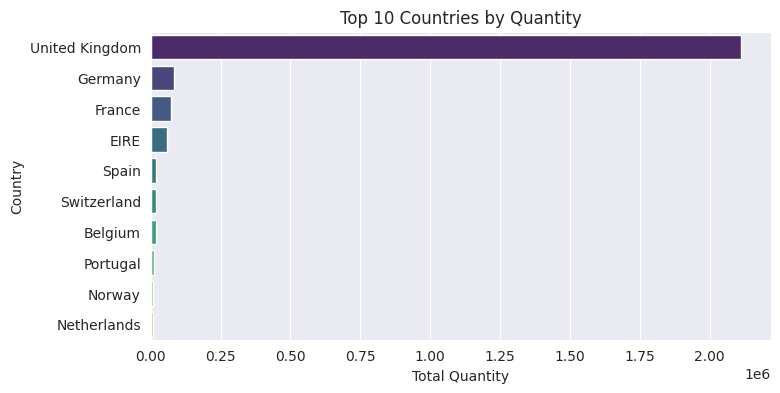

In [83]:
top_countries = df.groupby('Country')['Qunt'].sum().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.title('Top 10 Countries by Quantity')
plt.show()


In [84]:
print(top_countries)

Country
United Kingdom    2112950
Germany             82283
France              74476
EIRE                57323
Spain               18194
Switzerland         17769
Belgium             17611
Portugal            11916
Norway               9183
Netherlands          6875
Name: Qunt, dtype: int64


# *How does the average unit price (Uprice) vary across different countries? Show it with a bar chart.*

<ipython-input-88-32bf767a6e2e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_country.values, y=avg_price_by_country.index, palette='viridis')


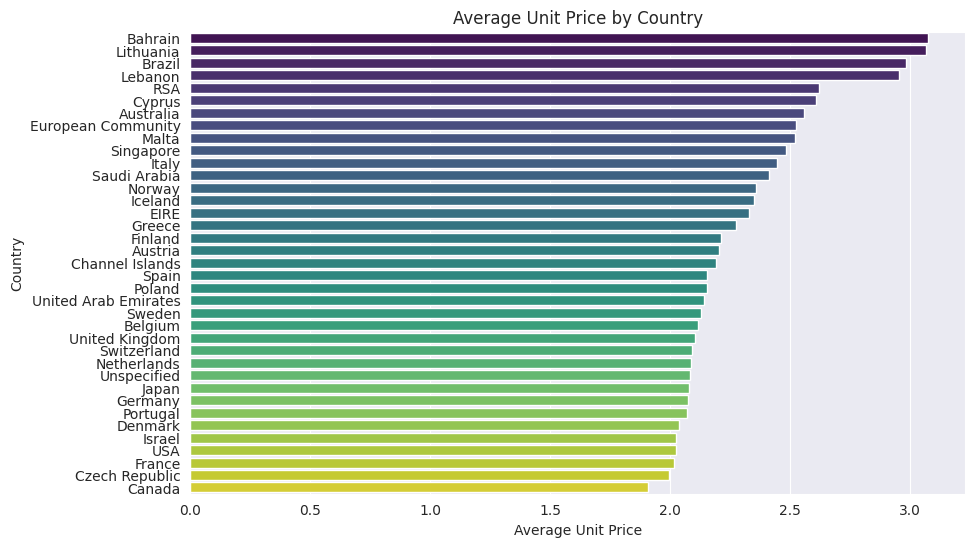

In [88]:
# Bar chart for average unit price by country
avg_price_by_country = df.groupby('Country')['Uprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_country.values, y=avg_price_by_country.index, palette='viridis')
plt.xlabel('Average Unit Price')
plt.ylabel('Country')
plt.title('Average Unit Price by Country')
plt.show()
